# Analysis of the Noita Eye Cipher

 In this notebook, I will be doing some analysis on the eye ciphers found in the game Noita. This is a puzzle that has not been solved in over 2 years of work. More background information can be found [here](https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#). 
 
 Here, my aim is to do some frequency analysis on the cipher with the hope that it can assist in the characterization of the cipher, and also allow other to use this code to easily 

### Citations:

Cipher codes pulled from here: https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#

More resources for the cipher: https://docs.google.com/spreadsheets/d/1Aih_3v9BMbVI-MQQgWP51HTTplgRwXi2jRKYgyhPMao/edit#gid=0


In [1]:
# Imports (Running )
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from eyecipher.cipher_message import CipherMessage

## Toggles

In [2]:
# Number of random samples to use for comparison
NUM_RANDOM_SAMPLES = 1000
# Boolean (True or False) for if certain results should be wrtitten to the outputs folder. This includes the trigram report 
WRITE_REPORT = True
# File name and location for reports to be written to
folder_name = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
output_dir = os.path.join("output", folder_name)
# File path to folder containing text files labele "east1.txt", "west1.txt".. ect to be read in
base_dir = os.path.join("cipher_data", "interleaved")

In [3]:
if WRITE_REPORT:
    os.makedirs(output_dir, exist_ok=True)

# 1 Setup Data
### 1.1 Read in the ciphers

In [4]:
# Define cipher file locations
east1 =  os.path.join(base_dir, "east1")
west1 =  os.path.join(base_dir, "west1")
east2 =  os.path.join(base_dir, "east2")
west2 =  os.path.join(base_dir, "west2")
east3 =  os.path.join(base_dir, "east3")
west3 =  os.path.join(base_dir, "west3")
east4 =  os.path.join(base_dir, "east4")
west4 =  os.path.join(base_dir, "west4")
east5 =  os.path.join(base_dir, "east5")

east1_message = CipherMessage(file_name = east1, name = "East 1")
west1_message = CipherMessage(file_name = west1, name = "West 1")
east2_message = CipherMessage(file_name = east2, name = "East 2")
west2_message = CipherMessage(file_name = west2, name = "West 2")
east3_message = CipherMessage(file_name = east3, name = "East 3")
west3_message = CipherMessage(file_name = west3, name = "West 3")
east4_message = CipherMessage(file_name = east4, name = "East 4")
west4_message = CipherMessage(file_name = west4, name = "West 4")
east5_message = CipherMessage(file_name = east5, name = "East 5")

combined_message = east1_message + west1_message + east2_message + \
                   west2_message + east3_message + west3_message + \
                   east4_message + west4_message + east5_message

all_messages = [east1_message,  west1_message, east2_message, \
                west2_message, east3_message, west3_message, \
                east4_message, west4_message, east5_message]

### 1.2 Set up random data for analysis

In [5]:
shuffled_trigrams = []
shuffled_eyes = []
random_eyes = []

unique_trigrams_random = 0
unique_trigrams_shuffled = 0

for i in range(NUM_RANDOM_SAMPLES):
    s_eye_data = combined_message.shuffle_eyes()
    shuffled_eyes.append(s_eye_data)
    unique_trigrams_shuffled += s_eye_data.num_unique_trigrams

    s_tri_data = combined_message.shuffle_trigrams()
    shuffled_trigrams.append(s_tri_data)
    
    r_eye_data = combined_message.random_eyes()
    random_eyes.append(r_eye_data)
    unique_trigrams_random += r_eye_data.num_unique_trigrams

unique_trigrams_random = unique_trigrams_random / NUM_RANDOM_SAMPLES
unique_trigrams_shuffled = unique_trigrams_shuffled / NUM_RANDOM_SAMPLES

all_eyes_shuffled = shuffled_eyes[0]
for message in shuffled_eyes[1:]:
    all_eyes_shuffled += message

all_trigrams_shuffled = shuffled_trigrams[0]
for message in shuffled_trigrams[1:]:
    all_trigrams_shuffled += message

all_random_eyes = random_eyes[0]
for message in random_eyes[1:]:
    all_random_eyes += message

### TODO: 1.3 Set up known encoded mesages here

# 2 Character Frequency Analysis

To begin, let's analyze the distribution of different eye glyphs within the message

In the encoding I am using:

- 0: ![Center](images/center.png) Center
- 1: ![Up](images/up.png) Up
- 2: ![Right](images/right.png) Right
- 3: ![Down](images/down.png) Down
- 4: ![Left](images/left.png) Left

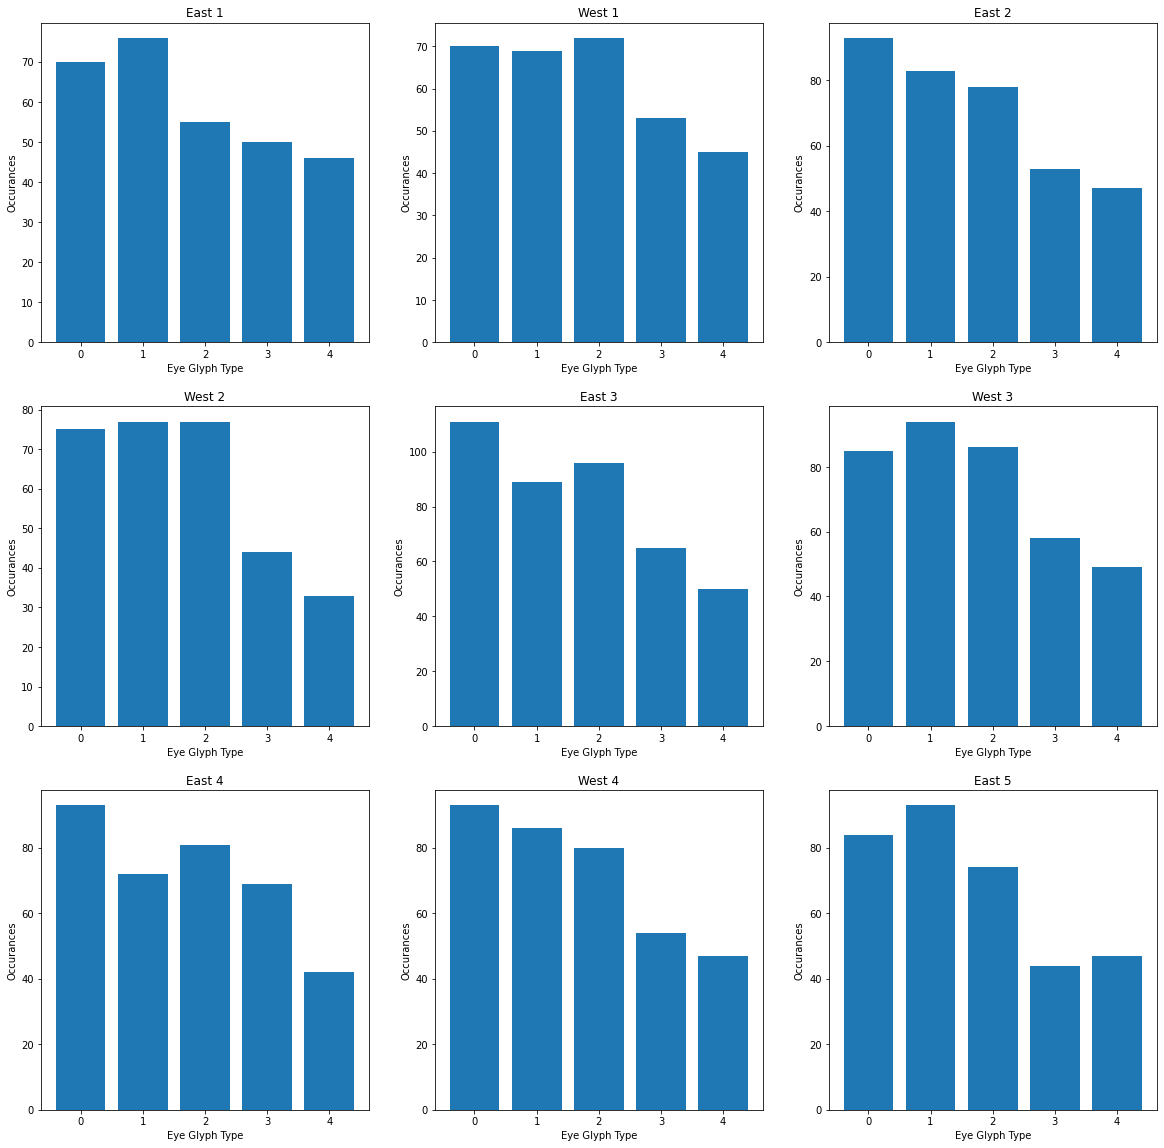

In [6]:
plt.figure(figsize=(20,20))

subplot_num = 1
for message in all_messages:
    # Grab counter data
    eyes = Counter(message.eyes)
    eyes = sorted(eyes.items())
    keys = [i[0] for i in eyes]
    vals = [i[1] for i in eyes]

    # Plot
    plt.subplot(3,3,subplot_num)
    plt.bar(keys, vals)
    plt.title(message.name)
    plt.xlabel("Eye Glyph Type")
    plt.ylabel("Occurances")
    
    subplot_num += 1

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"eye_glyph_distribution.png"))

plt.show()


Let's compare the aggragate of all of the glyphs with a random distribution of eyes

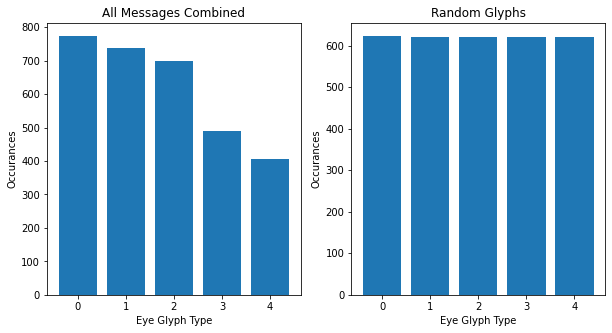

In [7]:
plt.figure(figsize=(10,5))
eyes = Counter(combined_message.eyes)
eyes = sorted(eyes.items())
keys = [i[0] for i in eyes]
vals = [i[1] for i in eyes]

# Plot
plt.subplot(1,2,1)
plt.bar(keys, vals)
plt.title("All Messages Combined")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

rand_eyes = Counter(all_random_eyes.eyes)
rand_eyes = sorted(rand_eyes.items())
rand_keys = [i[0] for i in rand_eyes]
rand_vals = [i[1]/NUM_RANDOM_SAMPLES for i in rand_eyes]

# Plot
plt.subplot(1,2,2)
plt.bar(rand_keys, rand_vals)
plt.title("Random Glyphs")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"eye_glyph_distribution_vs_random.png"))

plt.show()

# 3 Unique Trigram Analysis

Since the only common factor between all messages is 3, it is commonly agreed upon that the message is to be read as sets of trigrams (i.e. pairs of three characters grouped together).

Let's dig into the number of trigram patterns that appear, their frequencies, and some other information about them.


In [8]:
trigram_report = ""
unique_trigrams = [message.counter_unique_trigrams for message in all_messages]

for i in range(len(unique_trigrams)):
    header = "~~~~" + all_messages[i].name + "~~~~"
    stats = "Total Number of Trigrams: {}   Number of Unique Trigrams: {}".format(unique_trigrams[i].total(), len(unique_trigrams[i].keys()))
    full_stats = "Trigram frequencies: \n"+ str(unique_trigrams[i].most_common()) + "\n"
    
    print(header)
    print(stats)

    trigram_report += header + "\n"
    trigram_report += stats + "\n"
    trigram_report += full_stats

# Do the same as above, but with the aggragate of all messages
combined_trigrams = Counter(combined_message.trigrams)
header = "\n~~~~" + "All Messages" + "~~~~"
stats = "Total Number of Trigrams: {}   Number of Unique Trigrams: {}".format(combined_trigrams.total(), len(combined_trigrams.keys()))
full_stats = "Trigram frequencies: \n"+ str(combined_trigrams.most_common()) + "\n"

print(header)
print(stats)

trigram_report += header + "\n"
trigram_report += stats + "\n"
trigram_report += full_stats
combined_message

if WRITE_REPORT:
    file_name = "trigram_report.txt"
    file_path = os.path.join(output_dir, file_name)

    f = open(file_path, "w")
    f.write(trigram_report)
    f.close()
    print("Full report written at: {}".format(file_path))

~~~~East 1~~~~
Total Number of Trigrams: 99   Number of Unique Trigrams: 57
~~~~West 1~~~~
Total Number of Trigrams: 103   Number of Unique Trigrams: 57
~~~~East 2~~~~
Total Number of Trigrams: 118   Number of Unique Trigrams: 62
~~~~West 2~~~~
Total Number of Trigrams: 102   Number of Unique Trigrams: 61
~~~~East 3~~~~
Total Number of Trigrams: 137   Number of Unique Trigrams: 67
~~~~West 3~~~~
Total Number of Trigrams: 124   Number of Unique Trigrams: 65
~~~~East 4~~~~
Total Number of Trigrams: 119   Number of Unique Trigrams: 62
~~~~West 4~~~~
Total Number of Trigrams: 120   Number of Unique Trigrams: 68
~~~~East 5~~~~
Total Number of Trigrams: 114   Number of Unique Trigrams: 63

~~~~All Messages~~~~
Total Number of Trigrams: 1036   Number of Unique Trigrams: 83
Full report written at: output\2022_12_23-10_55_21_PM\trigram_report.txt


C:\Users\Joanie\AppData\Local\Temp\ipykernel_16244\2038948136.py:27: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])
C:\Users\Joanie\AppData\Local\Temp\ipykernel_16244\2038948136.py:35: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])
C:\Users\Joanie\AppData\Local\Temp\ipykernel_16244\2038948136.py:43: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


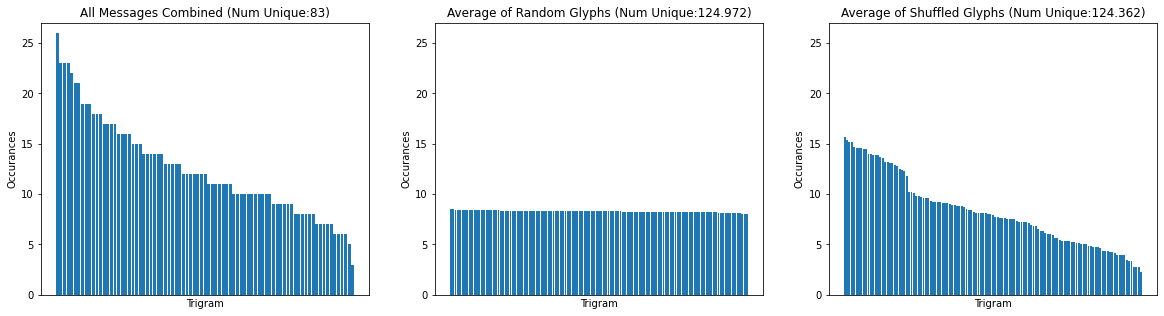

In [9]:
# Combined Messages
data = combined_trigrams.most_common()
keys = [i[0] for i in data]
vals = [i[1] for i in data]
unique_data = len(data)

# Random Eyes
rand_eyes = Counter(all_random_eyes.trigrams).most_common()
rand_keys = [i[0] for i in rand_eyes]
rand_vals = [i[1]/NUM_RANDOM_SAMPLES for i in rand_eyes]

# Shuffles Eyes
shuffled_eyes = Counter(all_eyes_shuffled.trigrams).most_common()
shuf_keys = [i[0] for i in shuffled_eyes]
shuf_vals = [i[1]/NUM_RANDOM_SAMPLES for i in shuffled_eyes]

# Plotting
plt.figure(figsize=(20,5))
y_limit = max( data[0][1], rand_eyes[0][1]/NUM_RANDOM_SAMPLES, shuffled_eyes[0][1]/NUM_RANDOM_SAMPLES ) + 1


plt.subplot(1,3,1)
plt.bar(keys, vals)
plt.title("All Messages Combined (Num Unique:{})".format(unique_data))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

plt.subplot(1,3,2)
plt.bar(rand_keys, rand_vals)
plt.title("Average of Random Glyphs (Num Unique:{})".format(unique_trigrams_random))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

plt.subplot(1,3,3)
plt.bar(shuf_keys, shuf_vals)
plt.title("Average of Shuffled Glyphs (Num Unique:{})".format(unique_trigrams_shuffled))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"trigram_distribution.png"))

plt.show()

## Bigram analysis
Here, I'll be looking at the bigrams within the trigrams of the message. More info on bigrams and what we can learn from analysing them [here](https://www.youtube.com/watch?v=uyH9-AHz-HY)

In [10]:
# Max number of repeating bigrams
for message in all_messages:
    bigrams = Counter([message.string[i:i+2] for i in range(len(message.string) -1)])
    print(bigrams.most_common()[0:5])

[('Rb', 1), ('b%', 1), ('%P', 1), ('P^', 1), ('^-', 1)]
[('pb', 1), ('b%', 1), ('%P', 1), ('P^', 1), ('^-', 1)]
[('Db', 1), ('b%', 1), ('%P', 1), ('P^', 1), ('^-', 1)]
[('B9', 2), ('^-', 2), ('lb', 1), ('b%', 1), ('%Q', 1)]
[('[I', 2), ('ZX', 2), ('_b', 1), ('b%', 1), ('%Q', 1)]
[('Bb', 1), ('b%', 1), ('%Q', 1), ('Qk', 1), ('kV', 1)]
[('n:', 2), (';b', 1), ('b%', 1), ('%Q', 1), ('Qk', 1)]
[('Kb', 2), ('?V', 2), ('mb', 1), ('b%', 1), ('%Q', 1)]
[('%Q', 2), ('kV', 2), ('Ab', 1), ('b%', 1), ('Qk', 1)]


Since we really don't have that many repeating bigrams within messages, I don't think we'll yeild any interesting information for analyzing them within each message. We'll compare them with random shuffles and with other messages

In [11]:
# TODO: finish message_groups.py and this will be less awful to run
#print(Counter([all_eyes_shuffled.string[i:i+2] for i in range(len(all_eyes_shuffled.string) -1)]).most_common()[0:10])
#print(Counter([all_random_eyes.string[i:i+2] for i in range(len(all_eyes_shuffled.string) -1)]).most_common()[0:10])
#print(Counter([all_trigrams_shuffled.string[i:i+2] for i in range(len(all_eyes_shuffled.string) -1)]).most_common()[0:10])


KeyboardInterrupt: 

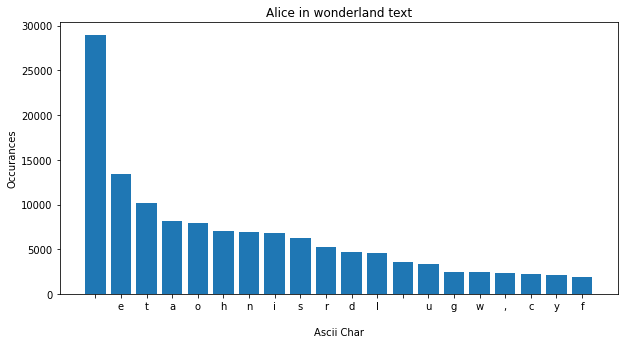

In [ ]:
f = open("alice.txt")
alice_text = f.read()
Counter(alice_text).most_common()[0:10]


plt.figure(figsize=(10,5))
data = Counter(alice_text).most_common()[0:20]
keys = [i[0] for i in data]
vals = [i[1] for i in data]

# Plot
plt.bar(keys, vals)
plt.title("Alice in wonderland text")
plt.xlabel("Ascii Char")
plt.ylabel("Occurances")
plt.show()

In [ ]:
f = open("alice.txt")
alice_text = f.read()
Counter(alice_text).most_common()[0:10]


plt.figure(figsize=(10,5))
data = Counter(alice_text).most_common()[0:20]
keys = [i[0] for i in data]
vals = [i[1] for i in data]

# Plot
plt.bar(keys, vals)
plt.title("Alice in wonderland text")
plt.xlabel("Ascii Char")
plt.ylabel("Occurances")
plt.show()

In [12]:
wikihow = [
    "a. Be loyal to your friends. You've probably heard of fair-weather friends. They're the ones who are happy to be around you when things are going well, but are nowhere to be found when you really need them. Being a loyal friend will attract other people to you who value that quality. This is a good way to put your money where your mouth is and attract the kind of friends you want in your life.",
    "b. Be reliable. When you say you'll do something, do it. Be someone that people know that they can count on. If you embody these qualities in your treatment of others, it will attract others who appreciate reliability and who will be reliable in return.",
    "c. Be a good listener. Many people think that in order to be seen as 'friend material,' they have to appear very interesting. Far more important than this, however, is the ability to show that you're interested in others. Listen carefully to what people say, remember important details about them (their names, their likes and dislikes), ask questions about their interests, and just take the time to learn more about them.",
    "d. Be trustworthy. One of the best things about having a friend is that you have someone to whom you can talk about anything, even secrets that you hide from the rest of the world. Before people even feel comfortable opening up to you, however, you need to build trust.",
    "e. Ask them out for lunch or coffee. That will give you a better opportunity to talk and get to know each other a little bit better. Invite them to join you for coffee sometime and give them your email address or phone number.",
    "f. Keep the conversation going with small talk. If the other person seems interested in continuing the conversation, try to keep it going by asking questions and offering a little information about yourself. It doesn’t have to be anything profound or super personal. The important thing",
    "g. Try a variety of conversation starters. Once you find a person you’re interested in becoming friends with, you need to initiate a conversation with that person. This will help you connect with them and start forming a friendship.",
    "h. Make eye contact and smile. If you don’t present a friendly and inviting appearance, people are less likely to be receptive to your friendship. Look people directly in the eye when they are speaking to you (or when you are speaking to them) and offer them",
    "i. Look for opportunities to talk to people. You can join a club, go to school, or go to church, but you still won't make friends if you don't actually talk to people. By the same token, you don't have to be involved with an organization to be social. Any time you talk to someone, you have a chance at making a lasting friend."
]

In [32]:
# Find alignments in text 
num_alignments = 0
aligned_char_hits = {}

min_len = min([len(text) for text in wikihow])
for i in range(min_len):
    char_row = [text[i] for text in wikihow]

    alignment_counts = Counter(char_row).most_common()
    # Check if we found an alignment
    if alignment_counts[0][1] > 1:
        num_alignments += 1
        aligned_chars = [item[0] for item in alignment_counts if item[1] > 1]
        
        for char in aligned_chars:
            if char in aligned_char_hits:
                aligned_char_hits[char] += 1
            else:
                aligned_char_hits[char] = 1
        


In [14]:
min_len = min([len(text) for text in wikihow])

{'.': 1,
 ' ': 108,
 'B': 1,
 'e': 54,
 'k': 1,
 'o': 41,
 'a': 15,
 'c': 4,
 't': 35,
 'n': 17,
 'y': 2,
 'r': 8,
 'i': 17,
 's': 6,
 'u': 4,
 "'": 1,
 'f': 6,
 'h': 6,
 'l': 8,
 'g': 2,
 'b': 1,
 'p': 1,
 'm': 1,
 'w': 2,
 'd': 2}